## 1) Feature Selection with Filtering Method|Constant,Quasi Constant and Duplicate Feature Removal
Unnessary and redundant features not only slow down the training time of an algorithm,but they also affect the performance of the algorithm.

There are several advantages of performing feature selection before training machine learning Model:
- Models with less number of features have higher explainability
- it is easier to implement machine learning models with reduces 
- Fewer features lead to enhanced generalization which in turn reduce overfitting
- Feature selection remove data redundancy
- Training time of models with fewer features is significantly lower
- Model with fewer features are less prone to errors

### What is Filter Method?

Features selected using filter methods can be used as an input to any machine learning models.
- Univariate:   Fisher Score, Mutual Information Gain, Variance etc
- Multivariate: Pearson Correlation

The univariate filter methods are the type of methods where individual feature are ranked according to specific criteria.The top N features are then selected.Different types of ranking criteria are used for univariate filter methods,for example fisher score,mutual information and variance of feature.

Multivariate filter methods are capable of removing redundant features from the data since they take the mutual relationship between the futures in to account.It is used to remove duplicate and correlated features from the data.

### Univariate Filtering Method in this lesson
- Constant Removal
- Quasi Constant Removal
- Duplicate Feature Removal


### Constant Feature Removal:

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import sklearn necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold

In [3]:
data = pd.read_csv('santander-train.csv',nrows=20000)
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
X = data.drop(['TARGET'],axis=1)
y = data['TARGET']
X.shape,y.shape

((20000, 370), (20000,))

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0,stratify=y)

In [6]:
X_train.shape,X_test.shape

((16000, 370), (4000, 370))

### Constant Features Removal

In [7]:
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)

VarianceThreshold(threshold=0)

In [8]:
# 291 features have "No Constant" Values, I said get_support() will give features that have "No Constant" values
constant_filter.get_support().sum()

291

In [9]:
#  to get all the features that are not constant, we can use the get_support() method of the filter
constant_filter.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

##### But we want to find all constant features so for this we creat a list replace all constant features(False value in constant_filter.get_support())

In [10]:

constant_list = [not temp for temp in constant_filter.get_support()]

In [11]:
len(constant_list)

370

In [12]:
constant_list

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 Fa

In [13]:
# Columns or features name that have constant values
print(X.columns[constant_list])

Index(['ind_var2_0', 'ind_var2', 'ind_var13_medio_0', 'ind_var13_medio',
       'ind_var18_0', 'ind_var18', 'ind_var27_0', 'ind_var28_0', 'ind_var28',
       'ind_var27', 'ind_var34_0', 'ind_var34', 'ind_var41', 'ind_var46_0',
       'ind_var46', 'num_var13_medio_0', 'num_var13_medio', 'num_var18_0',
       'num_var18', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27',
       'num_var34_0', 'num_var34', 'num_var41', 'num_var46_0', 'num_var46',
       'saldo_var13_medio', 'saldo_var18', 'saldo_var28', 'saldo_var27',
       'saldo_var34', 'saldo_var41', 'saldo_var46',
       'delta_imp_amort_var18_1y3', 'delta_imp_amort_var34_1y3',
       'delta_imp_reemb_var33_1y3', 'delta_imp_trasp_var17_out_1y3',
       'delta_imp_trasp_var33_out_1y3', 'delta_num_reemb_var33_1y3',
       'delta_num_trasp_var17_out_1y3', 'delta_num_trasp_var33_out_1y3',
       'imp_amort_var18_hace3', 'imp_amort_var18_ult1',
       'imp_amort_var34_hace3', 'imp_amort_var34_ult1', 'imp_var7_emit_ult1',
       'imp

In [14]:
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

In [15]:
X_train_filter.shape,X_train.shape,X_test_filter.shape,X_test.shape

((16000, 291), (16000, 370), (4000, 291), (4000, 370))

### Quasi Constant Removal(what?)

In [16]:
quasi_constant_filter = VarianceThreshold(threshold=0.01)
quasi_constant_filter.fit(X_train_filter)

VarianceThreshold(threshold=0.01)

In [17]:
quasi_constant_filter.get_support().sum()

245

In [18]:
# quasi constant feature
291-245

46

In [19]:
X_train_quasi_filter = quasi_constant_filter.transform(X_train_filter)
X_test_quasi_filter = quasi_constant_filter.transform(X_test_filter)

### Remove Duplicate Feature(100% similar value)

#### Sklearn has no direct library to handle duplicate features so first we convert all coulumns in to rows then python has method to find duplicate rows.

In [20]:
X_train_T = X_train_quasi_filter.T
X_test_T = X_test_quasi_filter.T

In [21]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [22]:
X_train_T.shape,X_test_T.shape

((245, 16000), (245, 4000))

In [23]:
X_train_T.duplicated().sum()

18

In [24]:
duplicate_features = X_train_T.duplicated()
duplicate_features

0      False
1      False
2      False
3      False
4      False
       ...  
240    False
241    False
242    False
243    False
244    False
Length: 245, dtype: bool

In [25]:
features_to_keep = [not index for index in duplicate_features]

In [26]:
X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T

In [27]:
X_train_unique

,0,1,2,3,4,5,6,7,8,9,...,235,236,237,238,239,240,241,242,243,244
0,17282.0,2.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63200.700000
1,38270.0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88640.610000
2,31526.0,2.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96314.160000
3,38737.0,2.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117568.020000
4,16469.0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,38333.0,2.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53324.460000
15996,26389.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56028.480000
15997,2025.0,2.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38272.440000
15998,17327.0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [28]:
X_train_unique.shape,X_train.shape

((16000, 227), (16000, 370))

In [29]:
370-227

143

### Ml model and compare the performance of the selected feature

In [30]:
def run_random_forest(X_train,X_test,y_train,y_test):
    clf = RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy on test set:',accuracy_score(y_test,y_pred))
    

In [31]:
%%time
run_random_forest(X_train,X_test,y_train,y_test)

Accuracy on test set: 0.9585
Wall time: 1.95 s


In [32]:
%%time
run_random_forest(X_train_unique,X_test_unique,y_train,y_test)

Accuracy on test set: 0.95875
Wall time: 1.14 s


### 2) Feature Selection with Autocorrelation (Pearson Correlation Coefficients)
<h5>How to find pearson coefficients?</h5>
<img src='corr.jpg'>

- Features Space to target correlation is `Desired`.
- Feature to Feature correlation is `Not-Desired`.
- If two feature is highly correlated then either feature is redundant
- Correlation in feature space increases model complexity.
- Removing correlated Features improve model performance
- Different model shows different performance over correlated features.

<h3>Our Task...</h3>
<h4>Our motive is to remove features that are highly correlated(cofficient value Greater than 0.85 and less than -0.85 to improve accuracy and reduce time to implement different model)</h4>



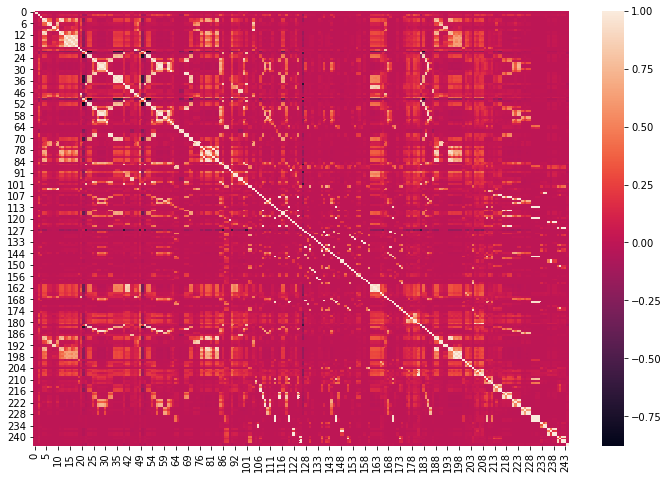

In [33]:
corrmat = X_train_unique.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corrmat)

In [34]:
def get_correlation(data,threshold):
    corr_col = set()
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i,j])>threshold:
                colname = corrmat.columns[i]
                corr_col.add(colname)
    return corr_col
                

In [35]:
corr_features = get_correlation(X_train_unique,0.85)
print(corr_features)

{5, 7, 9, 11, 12, 14, 15, 16, 17, 18, 23, 24, 28, 29, 30, 32, 33, 35, 36, 38, 42, 46, 47, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 67, 68, 69, 70, 72, 76, 80, 81, 82, 83, 84, 86, 87, 88, 91, 93, 95, 98, 100, 101, 103, 104, 111, 115, 117, 120, 121, 125, 136, 138, 143, 146, 149, 153, 154, 157, 158, 161, 162, 163, 164, 169, 170, 173, 180, 182, 183, 184, 185, 188, 189, 190, 191, 192, 193, 194, 195, 197, 198, 199, 204, 205, 207, 208, 215, 216, 217, 219, 220, 221, 223, 224, 227, 228, 229, 230, 231, 232, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243}


In [36]:
len(corr_features)

124

In [37]:
X_train_uncorr = X_train_unique.drop(labels=corr_features,axis=1)
X_test_uncorr = X_test_unique.drop(labels=corr_features,axis=1)

In [38]:
X_train_uncorr.shape,X_test_uncorr.shape

((16000, 103), (4000, 103))

In [39]:
%%time
run_random_forest(X_train_uncorr,X_test_uncorr,y_train,y_test)

Accuracy on test set: 0.95875
Wall time: 743 ms


In [40]:
%%time
run_random_forest(X_train,X_test,y_train,y_test)

Accuracy on test set: 0.9585
Wall time: 1.92 s


In [41]:
(1.37-0.689)*100/1.37

49.70802919708031

#### Yeh! one clap for reducing time up to 50% 

### Feature Grouping and Feature Importance
All we did above is not always recommended beacause there are some cases where group of features are correlated each other thats mean we only need to remove certain feature and we can keep some features by testing the features importance.

Here we will divide all features in to group and choose a single feature from each group by testing the features importance.

In [42]:
corrmat

,0,1,2,3,4,5,6,7,8,9,...,235,236,237,238,239,240,241,242,243,244
0,1.000000,-0.025277,-0.001942,0.003594,0.004054,-0.001697,-0.015882,-0.019807,0.000956,-0.000588,...,-0.001337,0.002051,-0.008500,0.006554,0.005907,0.008825,-0.009174,0.012031,0.012128,0.006612
1,-0.025277,1.000000,-0.007647,0.001819,0.008981,0.009232,0.001638,0.001746,0.000614,0.000695,...,0.000544,0.000586,0.000337,0.000550,0.000563,0.000922,0.000598,0.000875,0.000942,0.000415
2,-0.001942,-0.007647,1.000000,0.030919,0.106245,0.109140,0.048524,0.055708,0.004040,0.005796,...,0.025522,0.020168,0.011550,0.019325,0.019527,0.041321,0.016172,0.043577,0.044281,-0.000810
3,0.003594,0.001819,0.030919,1.000000,0.029418,0.024905,0.014513,0.013857,-0.000613,-0.000691,...,0.014032,-0.000583,-0.000337,-0.000548,-0.000561,0.000541,-0.000577,0.000231,0.000235,0.000966
4,0.004054,0.008981,0.106245,0.029418,1.000000,0.888789,0.381632,0.341266,0.012927,0.019674,...,0.002328,0.016743,-0.001662,0.020509,0.021276,-0.001905,-0.000635,-0.002552,-0.002736,0.003656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,0.008825,0.000922,0.041321,0.000541,-0.001905,0.000871,-0.000818,-0.000866,-0.000309,-0.000349,...,0.012705,0.021540,-0.000170,0.032162,0.030087,1.000000,0.329805,0.935317,0.919036,0.011106
241,-0.009174,0.000598,0.016172,-0.000577,-0.000635,0.007096,-0.000515,-0.000545,-0.000195,-0.000220,...,-0.000173,-0.000185,-0.000107,-0.000174,-0.000178,0.329805,1.000000,0.127224,0.140902,0.011807
242,0.012031,0.000875,0.043577,0.000231,-0.002552,-0.001672,-0.000779,-0.000825,-0.000295,-0.000332,...,0.027515,0.012393,-0.000162,0.018565,0.017358,0.935317,0.127224,1.000000,0.993536,0.008604
243,0.012128,0.000942,0.044281,0.000235,-0.002736,-0.001844,-0.000839,-0.000888,-0.000317,-0.000358,...,0.023072,0.014523,-0.000174,0.021742,0.020331,0.919036,0.140902,0.993536,1.000000,0.009136


first we will create stacks means for 0 row we choose all columns(00,01,02...) values then for 1 row we choose all columns values(10,11,12...). This process will be continue for all rows.

In [43]:
corrdata = corrmat.abs().stack()
print(corrdata)

0    0      1.000000
     1      0.025277
     2      0.001942
     3      0.003594
     4      0.004054
              ...   
244  240    0.011106
     241    0.011807
     242    0.008604
     243    0.009136
     244    1.000000
Length: 51529, dtype: float64


In [44]:
corrdata = corrdata.sort_values(ascending=False)
corrdata

29   58     1.000000e+00
58   29     1.000000e+00
134  158    1.000000e+00
158  134    1.000000e+00
182  182    1.000000e+00
                ...     
229  111    1.934954e-06
231  150    6.044672e-07
150  231    6.044672e-07
231  123    3.966696e-07
123  231    3.966696e-07
Length: 51529, dtype: float64

In [45]:
corrdata = corrdata[corrdata>0.85]
corrdata = corrdata[corrdata<1]
corrdata

143  135    1.000000
135  143    1.000000
136  128    1.000000
128  136    1.000000
31   62     1.000000
              ...   
67   66     0.851384
61   28     0.851022
28   61     0.851022
72   35     0.850893
35   72     0.850893
Length: 534, dtype: float64

In [46]:
corrdata = pd.DataFrame(corrdata).reset_index()
corrdata.columns = ['feature1','feature2','corr_value']

In [47]:
corrdata

,feature1,feature2,corr_value
0,143,135,1.000000
1,135,143,1.000000
2,136,128,1.000000
3,128,136,1.000000
4,31,62,1.000000
...,...,...,...
529,67,66,0.851384
530,61,28,0.851022
531,28,61,0.851022
532,72,35,0.850893


In [48]:
# grouping of our correlated features
grouped_feature_list = []
correlated_groups_list = []
for feature in corrdata.feature1.unique():
    if feature not in grouped_feature_list:
        correlated_block = corrdata[corrdata.feature1==feature]
        grouped_feature_list = grouped_feature_list + list(correlated_block.feature2.unique())
        correlated_groups_list.append(correlated_block)